### Question 1 
### ChatBot Summary Q1
(https://chatgpt.com/share/66f4e8e4-86c0-8002-8de2-bd92ea6a255b)

Here's a summary of our chat session:

1. **Dataset**: We worked with the Penguins dataset from Seaborn, specifically focusing on the `flipper_length_mm` variable for different species.

2. **Plotting Task**: You wanted to create histograms for `flipper_length_mm` for each species and mark key statistical metrics (mean, median, overall range, interquartile range, and two standard deviations from the mean) on the plots using Plotly.

3. **Code Explanation**:
   - We walked through the code that:
     - Loaded and cleaned the dataset.
     - Created histograms for each species.
     - Added vertical lines for the mean and median.
     - Added shaded rectangles to indicate the overall range, interquartile range, and ±2 standard deviations from the mean.
   - The code was enhanced to create a **custom legend** using invisible scatter points to represent the mean, median, range, IQR, and two standard deviations.

4. **Clarifications**: I explained how each part of the code works, including how the statistical markers were added and how a custom legend was constructed.

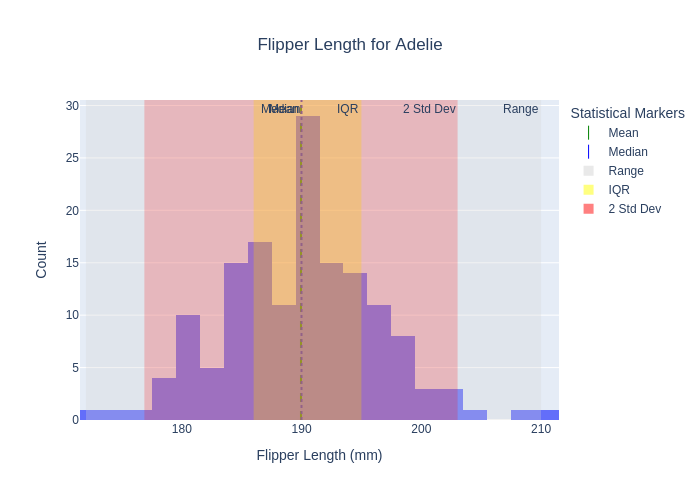

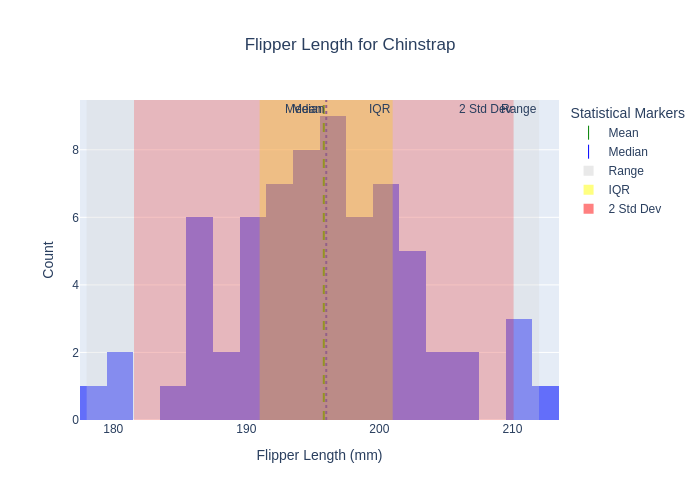

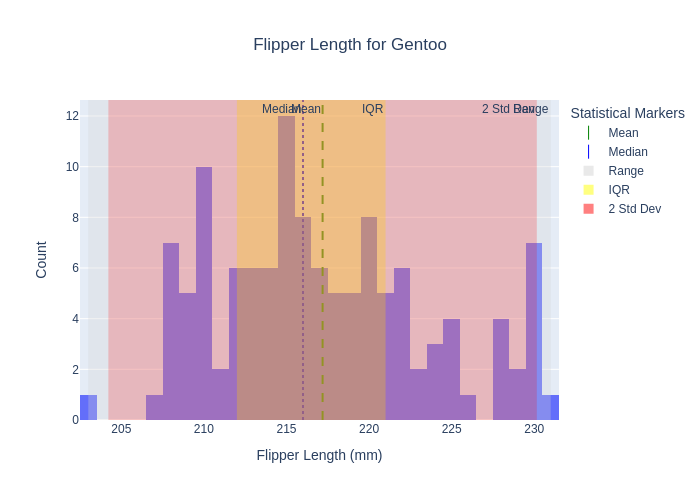

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_df = pd.read_csv(url)

# Filter out rows with missing values in flipper_length_mm and species
penguins_df = penguins_df.dropna(subset=["flipper_length_mm", "species"])

# Create histograms and add lines and rectangles for each species
species_list = penguins_df['species'].unique()

# Iterate over species and create a separate plot for each
for species in species_list:
    # Filter dataset for the current species
    species_df = penguins_df[penguins_df['species'] == species]
    
    # Statistics for flipper_length_mm
    flipper_mean = species_df['flipper_length_mm'].mean()
    flipper_median = species_df['flipper_length_mm'].median()
    flipper_std = species_df['flipper_length_mm'].std()
    flipper_min = species_df['flipper_length_mm'].min()
    flipper_max = species_df['flipper_length_mm'].max()
    flipper_q1 = species_df['flipper_length_mm'].quantile(0.25)
    flipper_q3 = species_df['flipper_length_mm'].quantile(0.75)
    
    # Create a histogram for the current species
    fig = px.histogram(species_df, x='flipper_length_mm', nbins=30, title=f'Flipper Length for {species}')
    
    # Add vertical lines for mean and median
    fig.add_vline(x=flipper_mean, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=flipper_median, line_dash="dot", line_color="blue", annotation_text="Median", annotation_position="top left")
    
    # Add vertical rectangle for the overall range
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor="lightgrey", opacity=0.3, line_width=0, annotation_text="Range")
    
    # Add vertical rectangle for the interquartile range (IQR)
    fig.add_vrect(x0=flipper_q1, x1=flipper_q3, fillcolor="yellow", opacity=0.3, line_width=0, annotation_text="IQR")
    
    # Add vertical rectangle for two standard deviations around the mean
    fig.add_vrect(x0=flipper_mean - 2*flipper_std, x1=flipper_mean + 2*flipper_std, 
                  fillcolor="red", opacity=0.2, line_width=0, annotation_text="2 Std Dev")
    
    # Add scatter points (invisible) to create custom legend
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', 
                             marker=dict(size=10, color='green', symbol='line-ns-open'), 
                             name='Mean'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', 
                             marker=dict(size=10, color='blue', symbol='line-ns-open'), 
                             name='Median'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', 
                             marker=dict(size=10, color='lightgrey', opacity=0.5, symbol='square'), 
                             name='Range'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', 
                             marker=dict(size=10, color='yellow', opacity=0.5, symbol='square'), 
                             name='IQR'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', 
                             marker=dict(size=10, color='red', opacity=0.5, symbol='square'), 
                             name='2 Std Dev'))

    # Update layout for axis titles and legend
    fig.update_layout(
        xaxis_title='Flipper Length (mm)',
        yaxis_title='Count',
        legend_title='Statistical Markers',
        title_x=0.5  # Center the title
    )

    # Show the plot
    fig.show(renderer="png")

### Question 2

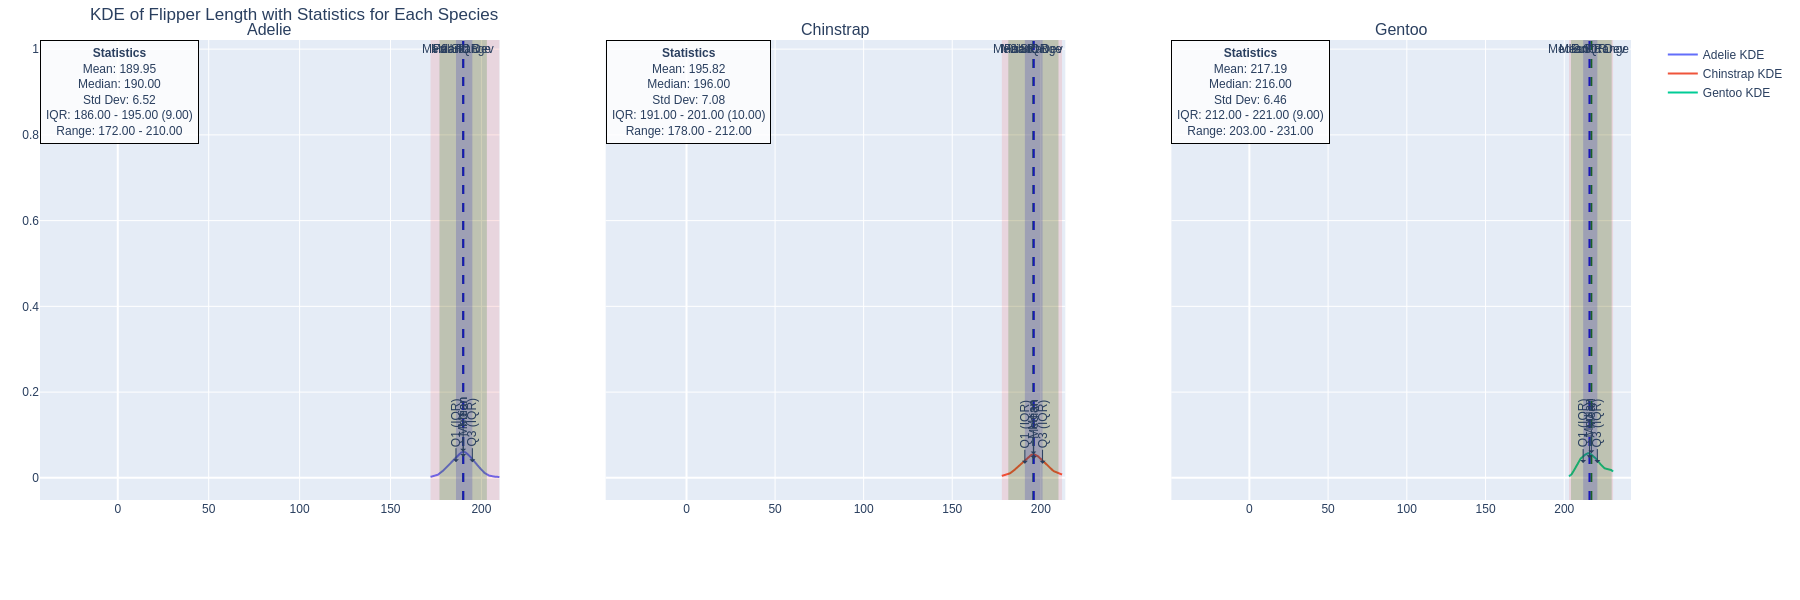

In [4]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy import stats

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values for simplicity
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Function to create KDE plot with markers for mean, median, and ranges
def create_kde_plot(species_name, species_data):
    # Kernel Density Estimate
    kde = stats.gaussian_kde(species_data)
    x_range = np.linspace(min(species_data), max(species_data), 1000)
    y_values = kde(x_range)
    
    # Calculate statistics
    mean_value = np.mean(species_data)
    median_value = np.median(species_data)
    std_dev = np.std(species_data)
    q1, q3 = np.percentile(species_data, [25, 75])
    iqr = q3 - q1
    min_value, max_value = min(species_data), max(species_data)

    # Create figure
    fig = go.Figure()

    # Add KDE line
    fig.add_trace(go.Scatter(x=x_range, y=y_values, mode='lines', name=f'{species_name} KDE'))

    # Add vertical lines for mean, median, and std
    fig.add_vline(x=mean_value, line_width=2, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_value, line_width=2, line_dash="dash", line_color="blue", annotation_text="Median", annotation_position="top left")

    # Add color blocks for ranges
    # IQR
    fig.add_vrect(x0=q1, x1=q3, fillcolor="blue", opacity=0.2, line_width=0, annotation_text="IQR", annotation_position="top left")
    # 2 Standard Deviations from the mean
    fig.add_vrect(x0=mean_value - 2*std_dev, x1=mean_value + 2*std_dev, fillcolor="green", opacity=0.2, line_width=0, annotation_text="2 Std Dev", annotation_position="top left")
    # Full Range
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="red", opacity=0.1, line_width=0, annotation_text="Full Range", annotation_position="top left")

    # Rotate the vertical labels for mean, median, etc.
    fig.add_annotation(x=mean_value, y=max(y_values), text="Mean", showarrow=True, arrowhead=1, ax=0, ay=-40, font=dict(size=12), textangle=-90)
    fig.add_annotation(x=median_value, y=max(y_values) * 0.8, text="Median", showarrow=True, arrowhead=1, ax=0, ay=-40, font=dict(size=12), textangle=-90)
    fig.add_annotation(x=q1, y=max(y_values) * 0.6, text="Q1 (IQR)", showarrow=True, arrowhead=1, ax=0, ay=-40, font=dict(size=12), textangle=-90)
    fig.add_annotation(x=q3, y=max(y_values) * 0.6, text="Q3 (IQR)", showarrow=True, arrowhead=1, ax=0, ay=-40, font=dict(size=12), textangle=-90)

    # Annotate the values inside the plot but positioned inside the plot to avoid obscuring the graph
    annotation_text = (f"<b>Statistics</b><br>"
                       f"Mean: {mean_value:.2f}<br>"
                       f"Median: {median_value:.2f}<br>"
                       f"Std Dev: {std_dev:.2f}<br>"
                       f"IQR: {q1:.2f} - {q3:.2f} ({iqr:.2f})<br>"
                       f"Range: {min_value:.2f} - {max_value:.2f}")
    
    fig.add_annotation(text=annotation_text, 
                       xref="paper", yref="paper",
                       x=0.95, y=0.9,  # Positioned inside the plot
                       showarrow=False, 
                       bgcolor="rgba(255, 255, 255, 0.8)",  # Opaque background
                       bordercolor="black", borderwidth=1, borderpad=5,
                       font=dict(size=12))

    # Update layout to cut the x-axis at 160
    fig.update_layout(title=f"{species_name} Flipper Length KDE",
                      xaxis_title="Flipper Length (mm)",
                      yaxis_title="Density",
                      showlegend=False,
                      xaxis_range=[160, max_value])  # Set x-axis to start at 160
    
    return fig

# Get species
species_list = penguins['species'].unique()

# Create a KDE plot for each species
figs = []
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    fig = create_kde_plot(species, species_data)
    figs.append(fig)

# Display all figures in a row
from plotly.subplots import make_subplots

# Create subplot layout with appropriate width ratios
subplot_fig = make_subplots(rows=1, cols=3, subplot_titles=species_list, shared_yaxes=True)

# Add each figure to the subplot
for i, fig in enumerate(figs):
    for trace in fig.data:
        subplot_fig.add_trace(trace, row=1, col=i+1)

    # Add the vertical lines and rects separately (Plotly doesn't auto-merge layout elements)
    for vline in fig.layout.shapes:
        subplot_fig.add_shape(vline, row=1, col=i+1)

    # Add the annotations (legend and labels) for each individual graph
    for annotation in fig.layout.annotations:
        subplot_fig.add_annotation(annotation, row=1, col=i+1)

# Adjust width and margin for a less squished view
subplot_fig.update_layout(height=600, width=1800, title_text="KDE of Flipper Length with Statistics for Each Species",
                          margin=dict(l=40, r=40, t=40, b=100))

# Show plot
subplot_fig.show(renderer="png")

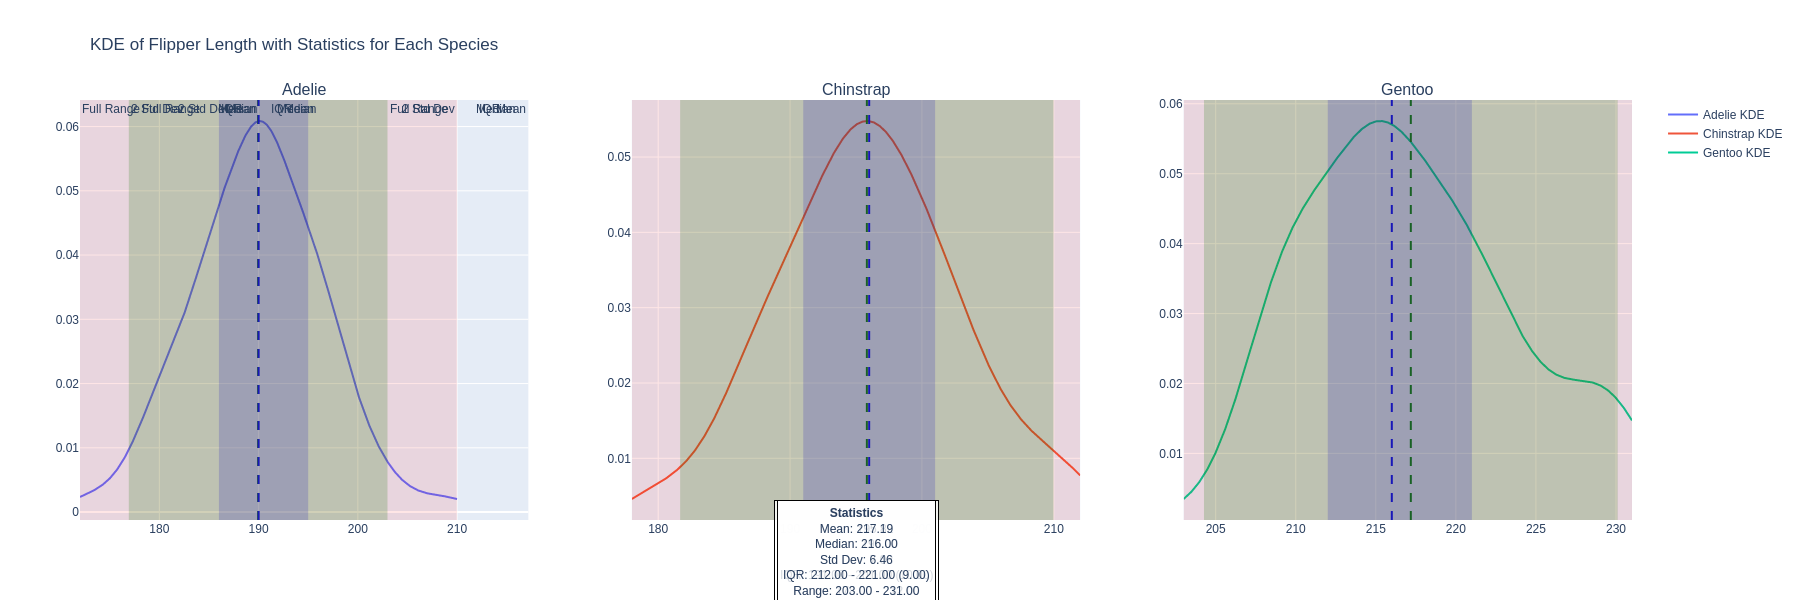

In [5]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy import stats

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values for simplicity
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Function to create KDE plot with markers for mean, median, and ranges
def create_kde_plot(species_name, species_data):
    # Kernel Density Estimate
    kde = stats.gaussian_kde(species_data)
    x_range = np.linspace(min(species_data), max(species_data), 1000)
    y_values = kde(x_range)
    
    # Calculate statistics
    mean_value = np.mean(species_data)
    median_value = np.median(species_data)
    std_dev = np.std(species_data)
    q1, q3 = np.percentile(species_data, [25, 75])
    iqr = q3 - q1
    min_value, max_value = min(species_data), max(species_data)

    # Create figure
    fig = go.Figure()

    # Add KDE line
    fig.add_trace(go.Scatter(x=x_range, y=y_values, mode='lines', name=f'{species_name} KDE'))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean_value, line_width=2, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_value, line_width=2, line_dash="dash", line_color="blue", annotation_text="Median", annotation_position="top left")

    # Add color blocks for ranges
    # IQR
    fig.add_vrect(x0=q1, x1=q3, fillcolor="blue", opacity=0.2, line_width=0, annotation_text="IQR", annotation_position="top left")
    # 2 Standard Deviations from the mean
    fig.add_vrect(x0=mean_value - 2*std_dev, x1=mean_value + 2*std_dev, fillcolor="green", opacity=0.2, line_width=0, annotation_text="2 Std Dev", annotation_position="top left")
    # Full Range
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="red", opacity=0.1, line_width=0, annotation_text="Full Range", annotation_position="top left")

    # Annotate the values inside the plot but positioned below the plot to avoid obscuring the graph
    annotation_text = (f"<b>Statistics</b><br>"
                       f"Mean: {mean_value:.2f}<br>"
                       f"Median: {median_value:.2f}<br>"
                       f"Std Dev: {std_dev:.2f}<br>"
                       f"IQR: {q1:.2f} - {q3:.2f} ({iqr:.2f})<br>"
                       f"Range: {min_value:.2f} - {max_value:.2f}")
    
    fig.add_annotation(text=annotation_text, 
                       xref="paper", yref="paper",
                       x=0.5, y=-0.2,  # Positioned below the plot
                       showarrow=False, 
                       bgcolor="rgba(255, 255, 255, 0.8)", # Opaque background
                       bordercolor="black", borderwidth=1, borderpad=5,
                       font=dict(size=12))

    # Update layout
    fig.update_layout(title=f"{species_name} Flipper Length KDE",
                      xaxis_title="Flipper Length (mm)",
                      yaxis_title="Density",
                      showlegend=False,
                      margin=dict(l=40, r=40, t=40, b=100))  # Increased bottom margin for legend
    
    return fig

# Get species
species_list = penguins['species'].unique()

# Create a KDE plot for each species
figs = []
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    fig = create_kde_plot(species, species_data)
    figs.append(fig)

# Display all figures in a row
from plotly.subplots import make_subplots

# Create subplot layout
subplot_fig = make_subplots(rows=1, cols=3, subplot_titles=species_list)

# Add each figure to the subplot
for i, fig in enumerate(figs):
    for trace in fig.data:
        subplot_fig.add_trace(trace, row=1, col=i+1)

    # Add the vertical lines and rects separately (Plotly doesn't auto-merge layout elements)
    for vline in fig.layout.shapes:
        subplot_fig.add_shape(vline, row=1, col=i+1)

    # Add the annotation (legend) to each plot, positioned below the plot
    for annotation in fig.layout.annotations:
        subplot_fig.add_annotation(annotation)

# Update the layout of the combined figure
subplot_fig.update_layout(height=600, width=1800, title_text="KDE of Flipper Length with Statistics for Each Species")

# Show plot
subplot_fig.show(renderer="png")

### ChatBot Summary Q2
#### Note: I couldn't get ChatGPT to create a graph where the scale is appropriate with legends on each graph that is legible, so I provided two graphs where one has proper annotation and one has a proper scale and visibility.
(https://chatgpt.com/share/66f60f9a-61bc-8002-ba83-a2b7240af082)

In this session, you asked for help with creating a series of KDE (Kernel Density Estimate) plots using the `penguins` dataset. Specifically, you wanted to mark key statistical features (mean, median, IQR, and standard deviations) on the KDE plots for flipper lengths of three penguin species (Adelie, Gentoo, Chinstrap) using Plotly.

Here's a summary of the key steps:

1. **KDE Plot with Statistical Markers**: I helped create a function to generate KDE plots for each species, adding vertical lines to indicate the mean, median, and ranges (IQR and two standard deviations from the mean). Colored blocks represent these ranges.
   
2. **Legends**: You wanted separate legends for each graph, showing the values of the mean, median, standard deviation, IQR, and range. I adjusted the legend for each plot, placing it inside the graph with an opaque background to avoid overlapping.

3. **Adjusting Plot Layout**: We worked to address the issue of squished KDE curves by improving subplot layout. Finally, I added the ability to "cut" the x-axis by setting a minimum value of 160 to improve the visibility of the KDE curves.

Throughout the session, you refined the layout and requested improvements for better readability of the legends and annotations.


### Question 3
What I think are some contrasting descriptions for the three "data distribution" graphs is that for KDEs and histograms, KDEs show a better sense of how many points are in the x-values around it which shows trend. Compared to a histogram where it shows count for each x-value, I feel as though it's harder to derive insights from it because it's difficult to see trends since there may be some bars which are very high and some that are low right next to eachother. It's hard to determine whether the graph may be increasing or decreasing, but KDEs show a gradual hill that take into account the x-values around it. Instead of a high bar beside a low bar which might cause confusion, KDEs will just show an increasing trend, for example, with a slight dip to take into account the low bar. This causes fewer confusions because you can still notice the upward trend. While box plots are superior in that it shows the intensity of outliers with the length of its whiskers. It's also easier to see mean and median in box plots because they are denoted with lines, as opposed to KDEs or histograms where the average may not be as apparent. 

ChatBot tells me the pros for histograms are that it identifies modes (clusters of data points), is easily interpreted, and visuzalizes distributions but some cons are that it's shape is dependent on the bin width, and since data points are aggregated into bins, we may lose information on individual data points. For KDEs, there is no bin constraints, shows density around specific x-values which is easier for identifying trends, and offers a continuous curve allowing for insight on gradual changes. However, calculating KDEs can be computationally expensive for large dataets and innappropriate bandwidths may distort the estimate. For box plots, they give summary statistics and easier outlier detection, but only gives a simplified view and no information around specific values.

Overall, I prefer KDEs because even though it isn't easy to identify the median and mean like in box plots, it's more useful in deriving insights from it's continuous curve and gradual changes that are less affected by outliers. KDEs also make it easier to compare relative shape sizes with other datasets, in this case other penguin species, to see how they relate to eachother and if you can apply previous proven insights from a similar graph shape to the current one.

### ChatBot Summary Q3
(no link because I used Microsoft Copilot not ChatGPT)

In our conversation, we discussed three common graph types: **histograms**, **kernel density estimates (KDEs)**, and **box plots**. Here's a concise summary:

1. **Histograms**:
   - Pros: Visualizes distribution, identifies modes, easy interpretation.
   - Cons: Bin dependence, loss of individual data points.

2. **KDEs**:
   - Pros: Smoothed representation, local density, no bin constraints.
   - Cons: Subjective bandwidth selection, computationally intensive.

3. **Box Plots**:
   - Pros: Summary statistics, comparison across groups, outlier detection.
   - Cons: Simplified view, no local information.

Combining these visualization techniques can provide a comprehensive understanding of data patterns

### Question 4

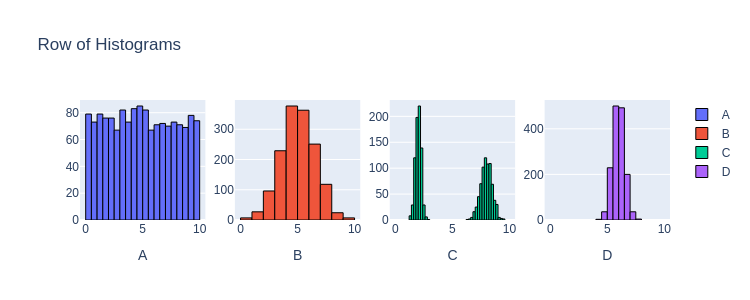

In [19]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png")

**1. Which datasets have similar means and similar variances**

A, B, and C have similar means but only *A and C* have similar means of ~4.9 *and* variances within 1 of each other.

**2. Which datasets have similar means but quite different variances**

A, B, and C have similar means but B has a quite different variance from A and C since all of their means are around or round to 5, but A and C's variances are ~8 and ~9 while B's variance is ~2. If we're looking at only 2 datasets, then B and C have the most similar means with one of the largest variances.

**3. Which datasets have similar variances but quite different means**

A and C have the most similar variances since their difference is the only one that is <1 which is the closest a variance can get with another in this dataset. The means of A and C are are pretty close but still a bit different. Since A and C are the only datasets with similar variances, then it's the only 2 sets that can satisfy the first part.

Although this is contradictory since A and C satisfy both 1 and 3, they are the only sets that have similar variances that will satisfy one part of the question.

**4. Which datasets have quite different means and quite different variances**

A and D have the most different means as A is the least mean and D has the greatest mean so their means are the greatest distance, making it the most different means. Their variances are also quite different from eachother as A's variance is ~8 while D's variance is ~0.3 which is a large distance.

In [20]:
print(np.mean(data1),np.mean(data2),np.mean(data3),np.mean(data4))

4.937452068953161 5.0508195403187015 4.99465140383644 5.989568328644456


In [113]:
np.var(data1), np.var(data2), np.var(data3), np.var(data4)

(8.293494895916085, 2.2779184605903975, 9.055601594529648, 0.26347053419415534)

### Question 5
The relationship between mean and median is that they are both measures of central tendency, one takes in outliers and one is not affected. Right and left skewness refer to the shape of a graph and can either mean mean>median or median>mean. The general relationship is that the mean and median are included in the left and right skew, and if the mean > median then it will be right skewed and the opposite is left skewed. Since median is not affected by outliers, there will be less skewness in the dataset when taking the average (since it's also a measure of central tendency). So since the mean is sensitive to outliers, it will result in a right or left skew, causing it to be either pulled left or right from the median. The general relationship is that mean determines the skewness of a dataset/graph and how far it's pulled away from the median. 

### ChatBot Summary Q5
(https://chatgpt.com/share/66f5d3f0-a520-8002-b50f-ecccd24492e7)

Here's a summary of our chat:

1. **Statistics Concepts**:
   - Discussed the relationship between mean, median, and skewness in distributions:
     - **Right Skew**: Mean > Median
     - **Left Skew**: Mean < Median
     - **Symmetrical**: Mean ≈ Median
   - Explained why these relationships occur, focusing on the influence of outliers on the mean and the robustness of the median.

2. **Code Explanation**:
   - Analyzed a Python code snippet that uses the `scipy`, `pandas`, and `numpy` libraries:
     - Generates a random sample from a gamma distribution.
     - Creates a histogram to visualize the distribution.
     - Calculates the mean and median of the sample.
     - Generates a second sample by negating the values of the first sample.

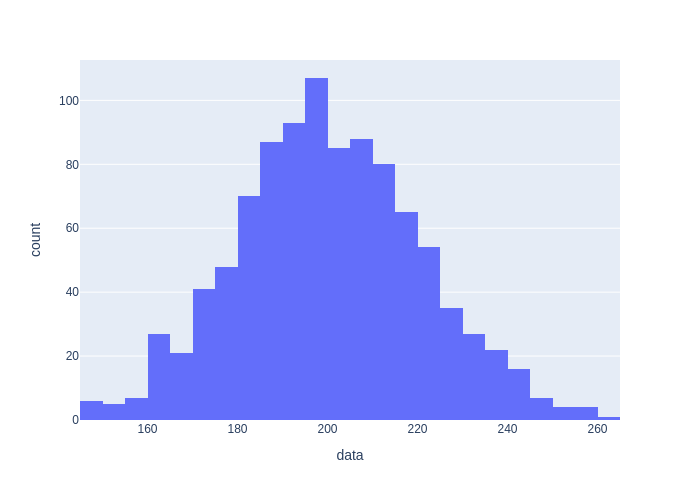

In [112]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=100,scale=2).rvs(size=1000) # increasing a makes it more symmetrical
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig1.show(renderer="png")

### Question 6

In [44]:
import pandas as pd
url = "https://raw.githubusercontent.com/andreamoleri/Hauntings/main/hauntings.csv"
hauntings = pd.read_csv(url)
hauntings.isna().sum()

city                 3
country              0
description          0
location             3
state                0
state_abbrev         0
longitude         1261
latitude          1261
city_longitude      29
city_latitude       29
dtype: int64

In [45]:
hauntings = hauntings.dropna()
hauntings

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097
...,...,...,...,...,...,...,...,...,...,...
10987,Westminster,United States,at 12 midnight you can see a lady with two lit...,city hall,Colorado,CO,-105.048936,39.862610,-105.037205,39.836653
10988,Westminster,United States,Is haunted by the victims of a murder that hap...,Pillar of Fire,Colorado,CO,-105.032091,39.847237,-105.037205,39.836653
10989,Wheat Ridge,United States,The institution was for kids 18 years old and ...,Ridge Mental Institution,Colorado,CO,-105.063974,39.769726,-105.077206,39.766098
10990,Wheat Ridge,United States,Gymnasium - their have been reports of a litt...,Wheat Ridge Middle School,Colorado,CO,-105.103613,39.764055,-105.077206,39.766098


In [4]:
hauntings.describe()

,longitude,latitude,city_longitude,city_latitude
count,9720.000000,9720.000000,9720.000000,9720.000000
mean,-91.991224,38.338672,-92.163662,38.351186
std,17.680825,5.255807,16.698917,5.120533
min,-164.722410,-45.023726,-164.723889,19.575619
25%,-99.118152,34.670672,-99.190276,34.664820
50%,-87.236621,39.277048,-87.288900,39.282579
75%,-80.298650,41.871198,-80.314925,41.878114
max,168.697269,66.892589,-67.998036,66.898333


In [91]:
hauntings.shape

(9720, 10)

In [9]:
grouped_stats = hauntings.groupby("state")["city"].describe()
grouped_stats

,count,unique,top,freq
state,,,,
Alabama,186,102,Gadsden,8
Alaska,27,11,Anchorage,10
Arizona,144,50,Tucson,28
Arkansas,98,65,Little Rock,7
California,1002,369,Los Angeles,60
Colorado,150,62,Colorado Springs,24
Connecticut,176,91,New Haven,10
Delaware,29,16,Newark,6
Florida,302,134,Orlando,32


In [11]:
la_hauntings = hauntings[hauntings["city"] == "Los Angeles"][["location", "city"]]
la_hauntings

,location,city
2796,Ambassador Hotel,Los Angeles
2797,Angel City Brewery,Los Angeles
2798,Bancroft Middle school,Los Angeles
2799,Bell Gardens,Los Angeles
2800,Belmont High School,Los Angeles
2801,Birmingham High School,Los Angeles
2802,Boyle Heights,Los Angeles
2803,Boyle Heights,Los Angeles
2804,Cal State L.A. Phase II,Los Angeles
2805,Carson,Los Angeles


In [12]:
state_location = hauntings[hauntings["city"] == "Los Angeles"].groupby("city")["location"].describe()
state_location

,count,unique,top,freq
city,,,,
Los Angeles,60,57,Boyle Heights,2


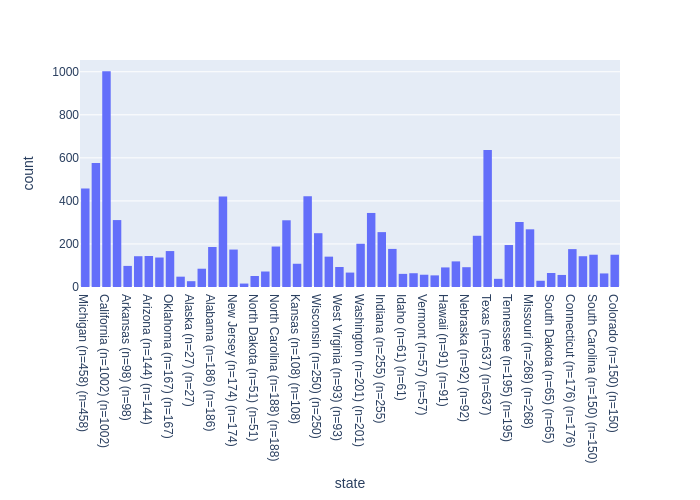

In [94]:
import plotly.express as px
keys = hauntings.state.value_counts().index.values
vals = hauntings.state.value_counts().index.values + " (n="+hauntings.state.value_counts().values.astype(str)+")"
hauntings.state = hauntings.state.map({k:v for k,v in zip(keys,vals)})

fig_state = px.histogram(hauntings, x='state')
fig_state.show(renderer="png")

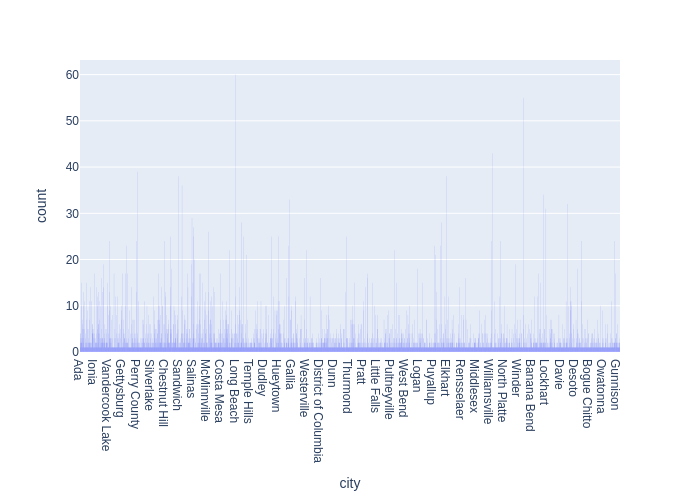

In [93]:
fig = px.histogram(hauntings, x='city')
fig.show(renderer="png")

After getting the summary statistics and looking at the visualizations, I'm surprised to find out that California has the largest number of haunting cases compared to all of the other states. This is surprising because it is the most inhabited state so I would assume there would be close to no hauntings compared to the countryside. It's important to note that most of these haunting cases appear in Los Angeles which may explain the large number since it is the hub for influencers like YouTubers to gather. By looking at the grouped statistics, we can conclude that Los Angeles, California has the largest number of 60 cases with San Antonia, Texas coming in a close second with 55. From our histograms, we can see that Washington DC has the fewest amount of haunting cases which is unexpected because I would assume that people would create stories of the ghost of past presidents haunting the area. You can make many data-driven assumptions from just simple histograms and summary statistics, which may be surprising because there is so much data in this dataset. Now knowing that Los Angeles has the most amount of haunting cases, I can look where in Los Angeles specifically and when I run a few pieces of code, I can tell that Boyle Heights has the most number of cases (2). We can also see from *la_hauntings* that it isn't just Boyle Heights with 2 cases, but Occidental College and Loyola Marymount University, which makes it apparent that *state_location* only shows the one one that comes first in the alphabet.

>I would love to use a KDE graph but it would make no sense as there's no need to look at the trend in hauntings, unless I was looking at a specific state over the years. Histograms are enough to derive some insights about, say, where to go for a likely chance at encountering a haunted area. As the data is not directly related to one another, there is no point in tracking trends.

### Question 7

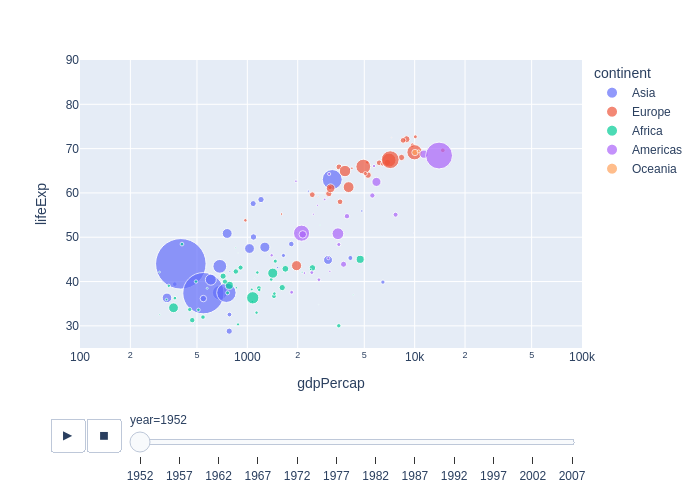

In [11]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country", size="pop", color="continent", 
           hover_name="country", log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])    
fig.show(renderer="png")

### Question 8

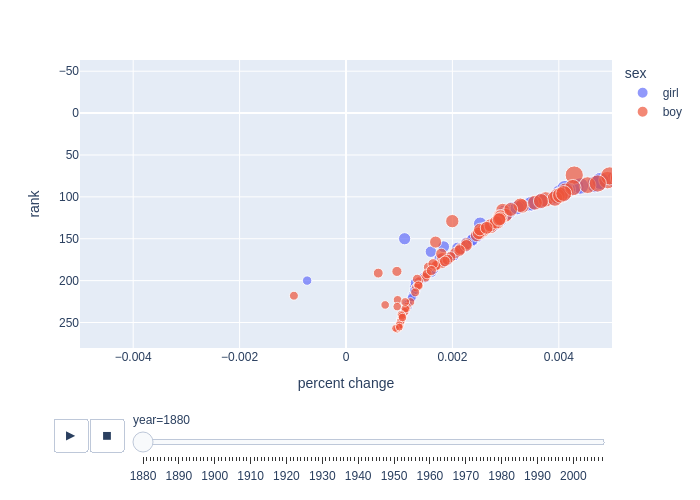

In [10]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Question 9
No